# Plot Entities

### **Pre-requisite**

Install required Python packages.

In [ ]:
%pip install --upgrade purviewcli
%pip install --upgrade pandas
%pip install --upgrade matplotlib

Load Python Libraries

In [ ]:
import json
import pandas as pd

### **1\. Set the Environment Variable**

Before purviewcli can be used, the environment variable `PURVIEW_NAME` needs to be set.

In [ ]:
# Environment Variables
%env PURVIEW_NAME=YOUR_PURVIEW_ACCOUNT
%env AZURE_CLIENT_ID=YOUR_CLIENT_ID
%env AZURE_TENANT_ID=YOUR_TENANT_ID
%env AZURE_CLIENT_SECRET=YOUR_CLIENT_SECRET

### **1\. Populate DataFrame**

Populate Pandas DataFrame with Azure Purview search results.

In [ ]:
# Initialise Variables
batch_size = 500
offset = 0
my_items = []

# Initial Search Query
my_output = !pv search query --keywords "*" --limit {batch_size}
my_data = json.loads(''.join(my_output))
my_items.extend(my_data['value'])
offset += batch_size

# Additional Requests
search_count = my_data['@search.count']
while offset < search_count:
    my_output = !pv search query --keywords "*" --limit {batch_size} --offset {offset}
    my_data = json.loads(''.join(my_output))
    my_items.extend(my_data['value'])
    offset += batch_size
df = pd.DataFrame(my_items)

### **2\. Plot Graph**

Example of how to plot number of entities by type.

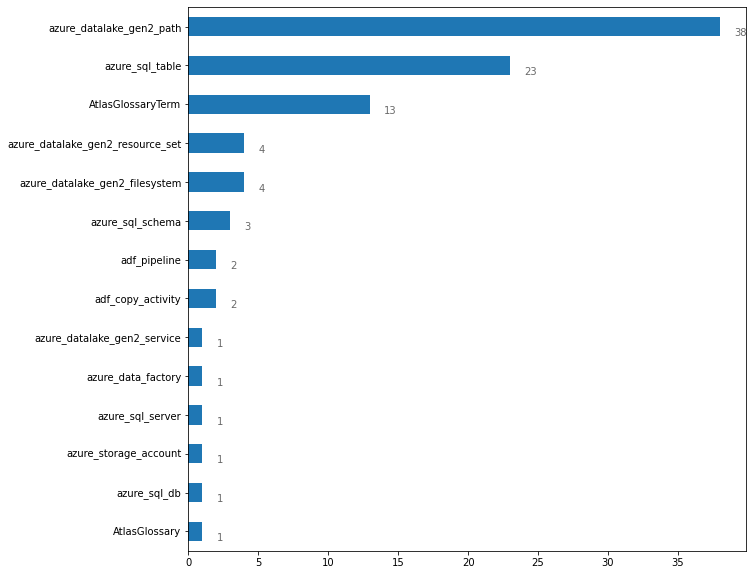

In [17]:
plotdata = df['entityType'].value_counts().sort_values(ascending=True)
ax = plotdata.plot(kind='barh', figsize=(10,10))
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y(), str(i.get_width()), fontsize=10, color='dimgrey')